In [1]:
%matplotib inline
%pylab inline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib.colors import LogNorm

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd QAM6bit/

C:\Users\ChiefGuti\Documents\Lund University\Thesis\MLImplementacion\QAM6bit


In [3]:
def BER(x,y):
    j=0
    for i in range(len(x)):
        if(x[i]!=y[i]):
            j+=1
    return(j/len(x))
def ColorMap(Word,Map,M):
    Cmap=arange(M)
    for i in range(len(Word)):
        for j in range(len(Cmap)):
            if(Word[i]==Org[j]):
                Map[i]=Cmap[j]
def NormData(DataSet,data):
    for i in range(len(data[:,0])):
        DataSet[i,0]=data[:,0][i]
        DataSet[i,1]=data[:,1][i]
    DataSet[:,0]=DataSet[:,0]/max(DataSet[:,0])
    DataSet[:,1]=DataSet[:,1]/max(DataSet[:,1])

In [4]:
Code=loadtxt('PBRSout.txt',skiprows=5)

In [5]:
INT=[]
for i in range(int(len(Code)/6)):
    INT.append(i*6)
CodeWord=[]
for i in range(len(Code)):
    CodeWord.append(str(int(Code[i])))

Word=[]
Org=[]
j=0
for i in INT:
    Word.append(CodeWord[i]+CodeWord[i+1]+CodeWord[i+2]+CodeWord[i+3]+CodeWord[i+4]+CodeWord[i+5])
    
    if((Word[j] in Org)==False ):
        Org.append(Word[j])
    j=j+1
Map=zeros(len(Word))
ColorMap(Word,Map,64)

In [6]:
R=[3,4,5,6,8]
OSNR=[15,17,19,20,22,24,25]

In [7]:
ber=zeros((len(R),len(OSNR)))
for r in range(len(R)):
    for osnr in range(len(OSNR)):
        data = loadtxt('OutRx_DualPol6bOSNR%iR%i.txt'%(OSNR[osnr],R[r]),delimiter=';')
        data=data[1::2][:]
        #Normalize IQ data after splice
        DataSet=zeros((len(data[:,0]),2))
        NormData(DataSet,data)
        X_train, X_test, y_train, y_test = train_test_split(DataSet, Map, test_size = 0.20)
        svclassifier = SVC(kernel='rbf',gamma=0.1, C=1000)
        svclassifier.fit(X_train, y_train)
        y_prediction= svclassifier.predict(X_test)
        ber[r,osnr]=BER(y_test,y_prediction)
        #print(confusion_matrix(y_test,y_prediction))
        #print(classification_report(y_test,y_prediction))

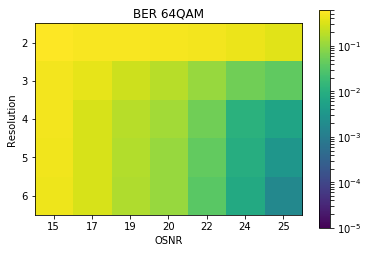

In [16]:
fig,ax=subplots()
im = ax.imshow(ber,norm=LogNorm(vmin=0.00001,vmax=0.6))
ax.set_yticklabels((0,2,3,4,5,6,8))
ax.set_xticklabels((0,15,17,19,20,22,24,25))
fig.colorbar(im, ax=ax)
ylabel('Resolution')
xlabel('OSNR')
title('BER 64QAM')
savefig('BER64QAM.png')

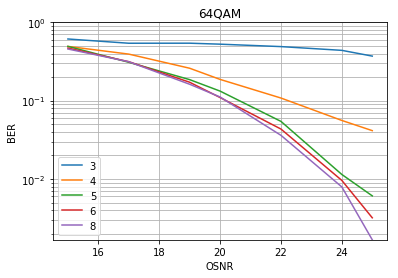

In [14]:
for r in range(len(R)):
    semilogy(OSNR,ber[r,:],label=R[r])
    grid(True,which='both')
    legend()
    ylim(0,1)
    ylabel('BER')
    xlabel('OSNR')
title('64QAM')
savefig('64QAMplot.png')